### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## 얼굴 이미지 PCA 적용

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### LFW(Labeled Faces in the Wild) 얼굴 이미지 다운로드

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [4]:
help(fetch_lfw_people)

Help on function fetch_lfw_people in module sklearn.datasets.lfw:

fetch_lfw_people(data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True)
    Loader for the Labeled Faces in the Wild (LFW) people dataset
    
    This dataset is a collection of JPEG pictures of famous people
    collected on the internet, all details are available on the
    official website:
    
        http://vis-www.cs.umass.edu/lfw/
    
    Each picture is centered on a single face. Each pixel of each channel
    (color in RGB) is encoded by a float in range 0.0 - 1.0.
    
    The task is called Face Recognition (or Identification): given the
    picture of a face, find the name of the person given a training set
    (gallery).
    
    The original images are 250 x 250 pixels, but the default slice and resize
    arguments reduce them to 62 x 47.
    
    Parameters
    ----------
    data_home : optional, d

### 다운로드 로그
```
Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
INFO:sklearn.datasets.lfw:Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
INFO:sklearn.datasets.lfw:Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
INFO:sklearn.datasets.lfw:Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015
INFO:sklearn.datasets.lfw:Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015
C:\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
  ...
```

### 디렉토리 구조
- 사용자 디렉토리에 저장됨.
```(C:\Users\[user_name]\scikit_learn_data\lfw_home)```
---
```
!dir C:\Users\Sejun\scikit_learn_data\lfw_home
----------------------------------------------
2018-10-24  오후 02:33    <DIR>          .
2018-10-24  오후 02:33    <DIR>          ..
2018-10-24  오후 02:33    <DIR>          joblib
2007-11-14  오전 02:57    <DIR>          lfw_funneled
2018-10-24  오후 02:28           155,335 pairs.txt
2018-10-24  오후 02:28            26,002 pairsDevTest.txt
2018-10-24  오후 02:28            56,579 pairsDevTrain.txt
               3개 파일             237,916 바이트
               4개 디렉터리  179,418,025,984 바이트 남음
```

<img src="Aaron_Eckhart_0001.jpg" />C:\Users\Sejun\scikit_learn_data\lfw_home\lfw_funneled\Aaron_Eckhart\Aaron_Eckhart_0001.jpg<br>
250\*250\*24 해상도(컬러 RGB 3채널)

### 불러온 그림 확인
- 총 3023개 이미지, 87\*65 해상도, 흑백이미지(채널 1개)
- 총 62명

In [4]:
len(people.target_names)

62

In [5]:
i=0
for n,c in zip(people.target_names,np.bincount(people.target)):
    print('%02d : %-25s %3d' % (i,n,c))
    i+=1

00 : Alejandro Toledo           39
01 : Alvaro Uribe               35
02 : Amelie Mauresmo            21
03 : Andre Agassi               36
04 : Angelina Jolie             20
05 : Ariel Sharon               77
06 : Arnold Schwarzenegger      42
07 : Atal Bihari Vajpayee       24
08 : Bill Clinton               29
09 : Carlos Menem               21
10 : Colin Powell              236
11 : David Beckham              31
12 : Donald Rumsfeld           121
13 : George Robertson           22
14 : George W Bush             530
15 : Gerhard Schroeder         109
16 : Gloria Macapagal Arroyo    44
17 : Gray Davis                 26
18 : Guillermo Coria            30
19 : Hamid Karzai               22
20 : Hans Blix                  39
21 : Hugo Chavez                71
22 : Igor Ivanov                20
23 : Jack Straw                 28
24 : Jacques Chirac             52
25 : Jean Chretien              55
26 : Jennifer Aniston           21
27 : Jennifer Capriati          42
28 : Jennifer Lopez 

(3023, 87, 65)

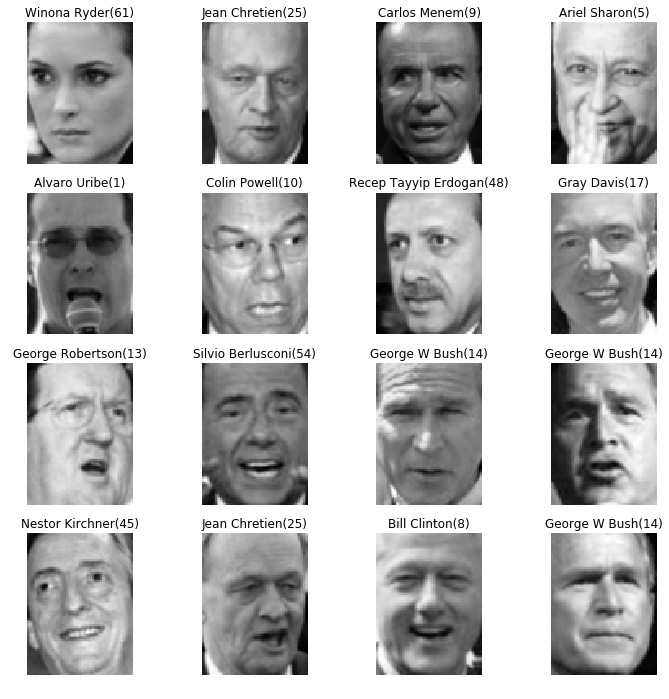

In [6]:
display(people.images.shape)

plt.figure(figsize=[12,12])
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.title(people.target_names[people.target[i]]+'(%d)' % people.target[i])
    plt.imshow(people.images[i], interpolation='none', cmap='gray')
    # interpolation 을 'none' 으로 주지 않으면 주변 픽셀을 고려하여 부드러운 이미지를 만들어 준다
    plt.axis('off')

In [6]:
# 한 사람당 50개 까지만 사진을 뽑는다
mask = np.zeros(len(people.target), dtype='bool')

for i in range(62):
    mask[np.where(people.target==i)[0][:50]] = True
    
X = people.images[mask]
y = people.target[mask]

X = X / 255. # 0~1 scaling (원래 이미지는 0~255 까지의 실수값이다)
X = X.reshape(X.shape[0],-1)

In [7]:
X.shape, y.shape

((2063, 5655), (2063,))

### k-NN 적용

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier(1)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.27325581395348836

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.5445736434108527

### PCA 적용
- 아래에서 PCA(whiten=True) 옵션은 PCA 변환후 각 주성분의 길이가 1이 되도록 정규화 하는 것이다. (PCA 변환 후 주성분들을 Normalizer 적용한 것과 같음) 이렇게 하는 이유는 각 주성분이 너무 어두워지거나 너무 밝아지는 것을 방지하기 위함이다.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(100, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

In [11]:
pca.components_.shape

(100, 5655)

In [12]:
pca.components_[0]

array([-0.00345435, -0.00399993, -0.00453246, ..., -0.0048793 ,
       -0.00434237, -0.00354142], dtype=float32)

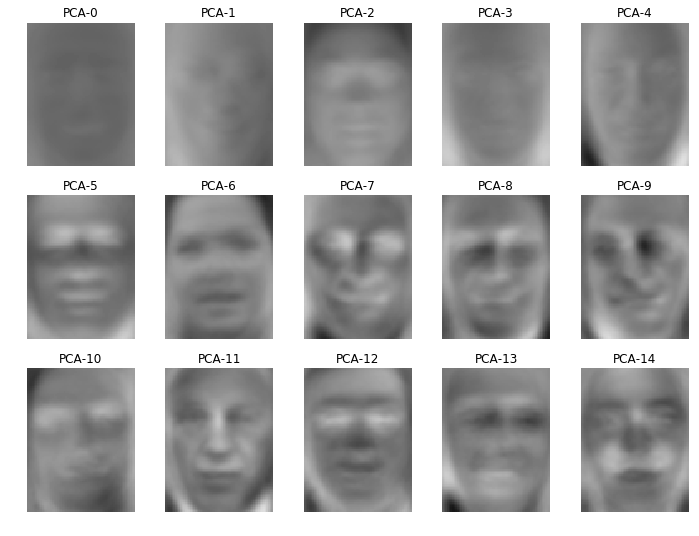

In [13]:
plt.figure(figsize=[12,9])
vmin = pca.components_.min()
vmax = pca.components_.max()

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.title('PCA-%d' % i)
    plt.imshow(pca.components_[i].reshape(87,65), interpolation='none', cmap='gray',
              vmax=vmax, vmin=vmin)
    plt.axis('off')

### PCA 변환 후 분류

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y)

model = KNeighborsClassifier(1)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.2441860465116279

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_pca, y)

model = SVC(C=100, gamma=0.01)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.43992248062015504

### PCA 변환 후 이미지 복원
- 위 그림에서는 명암 차이만 의미가 있다. 즉 반전한 이미지로도 생각할 수 있다. 왜냐하면 PCA 는 방향벡터이기 때문이다.
- PCA 변환된 이미지에서 다시 원본 이미지로 복구해 보겠다.
- 원래 이미지는 픽셀(속성)이 87\*65=5655 이었지만, PCA 변환후 속성이 100개로 줄었다. 그 만큼 원본 이미지에 손실이 생긴것이다.

In [15]:
recovered_10 = np.matmul(X_pca[:,:10], pca.components_[:10])
recovered_50 = np.matmul(X_pca[:,:50], pca.components_[:50])
recovered_100 = np.matmul(X_pca, pca.components_)

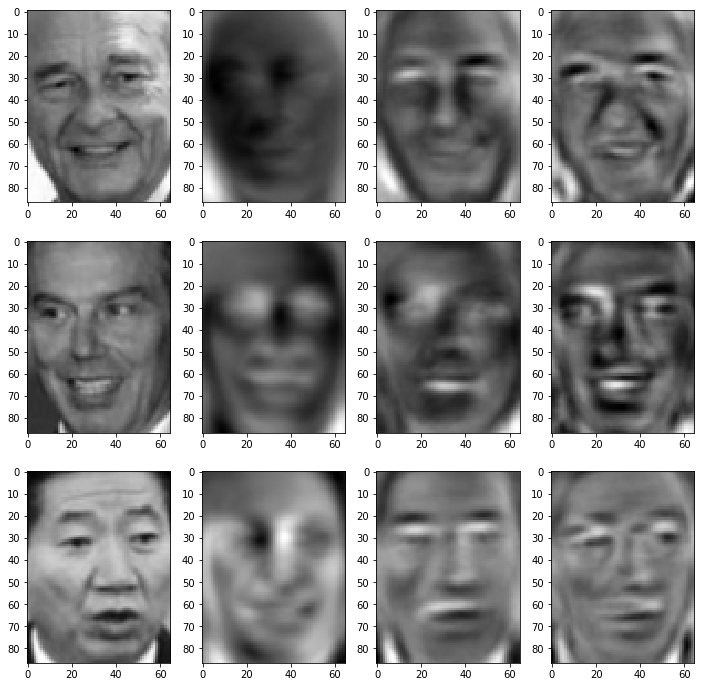

In [16]:
whos = [88, 604, 70] # np.where(y==50) 과 같이 원하는 사람 선정 (50은 노무현임)
plt.figure(figsize=[12,12])

for i in range(len(whos)):
    plt.subplot(len(whos), 4, i*4+1)
    plt.imshow(X[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+2)
    plt.imshow(recovered_10[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+3)
    plt.imshow(recovered_50[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+4)
    plt.imshow(recovered_100[whos[i]].reshape(87,65), interpolation='none', cmap='gray')

In [63]:
np.where(y==50)

(array([  70,  185,  244,  317,  373,  376,  487,  609,  736,  970, 1098,
        1121, 1164, 1170, 1265, 1296, 1306, 1309, 1498, 1503, 1574, 1609,
        1734, 1756, 1772, 1800, 1878, 1890, 1917, 1997, 2033, 2048],
       dtype=int32),)

### 화이트닝 없이 적용

In [17]:
from sklearn.decomposition import PCA

pca = PCA(100)
pca.fit(X)
X_pca = pca.transform(X)

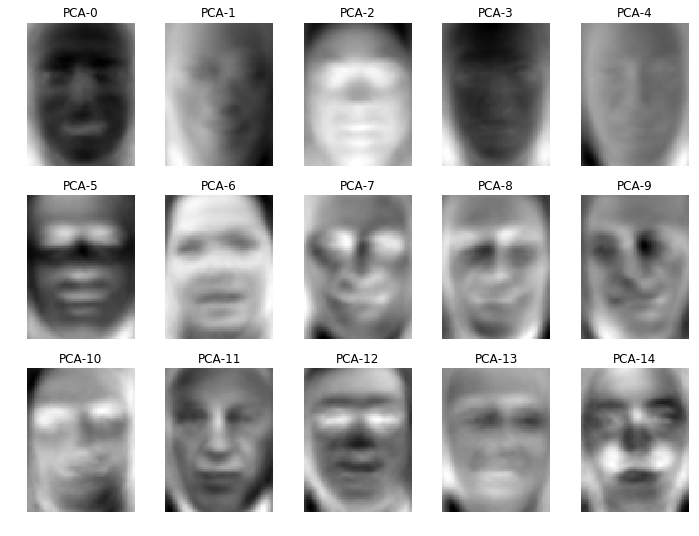

In [20]:
plt.figure(figsize=[12,9])
# vmin = pca.components_.min()
# vmax = pca.components_.max()

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.title('PCA-%d' % i)
#     plt.imshow(pca.components_[i].reshape(87,65), interpolation='none', cmap='gray',
#               vmax=vmax, vmin=vmin)
    plt.imshow(pca.components_[i].reshape(87,65), interpolation='none', cmap='gray')

    plt.axis('off')

In [21]:
recovered_10 = np.matmul(X_pca[:,:10], pca.components_[:10])
recovered_50 = np.matmul(X_pca[:,:50], pca.components_[:50])
recovered_100 = np.matmul(X_pca, pca.components_)

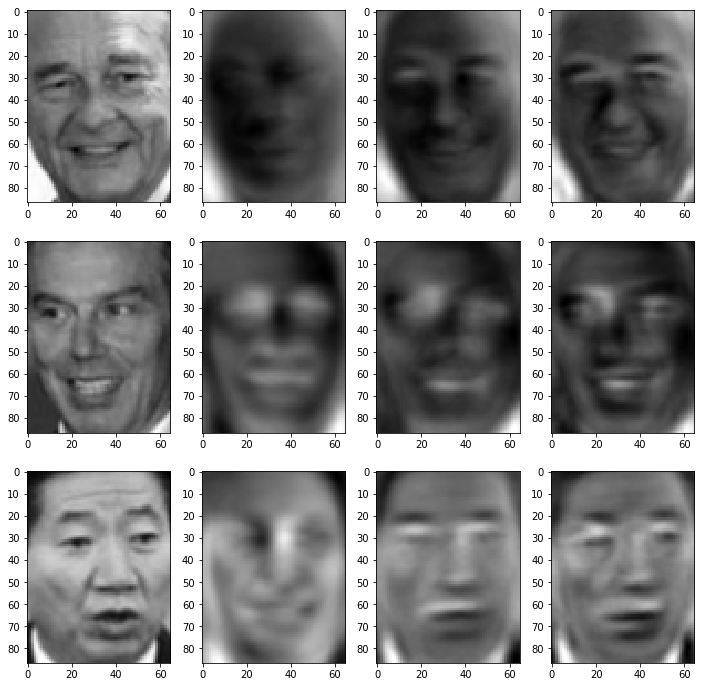

In [22]:
whos = [88, 604, 70] # np.where(y==50) 과 같이 원하는 사람 선정 (50은 노무현임)
plt.figure(figsize=[12,12])

for i in range(len(whos)):
    plt.subplot(len(whos), 4, i*4+1)
    plt.imshow(X[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+2)
    plt.imshow(recovered_10[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+3)
    plt.imshow(recovered_50[whos[i]].reshape(87,65), interpolation='none', cmap='gray')
    
    plt.subplot(len(whos), 4, i*4+4)
    plt.imshow(recovered_100[whos[i]].reshape(87,65), interpolation='none', cmap='gray')